In [31]:
import numpy as np
import random

# TODO: In "for a in action[s]" add wall
# TODO: Plot delta over iteration for seeing how it smallens everytime

for i in range(3):
    for j in range(4):
        states.append((i+1, j+1))

states.remove((1, 3))
states.insert(0, (1,3))

### Create reward dictionary
rewards = {}

for state in states:
    # Green Terminal State
    if state == (1,4):
        rewards[state] = 1

    # Red Terminal State
    elif state == (2, 4):
        rewards[state] = -1

    # For all other states
    else:
        rewards[state] = 0
    
### Define actions
# U = Up, D = Down, L = Left, R = Right
actions = {
    (3, 1): ["U", "R"],             # Start state
    (1, 1): ["D", "R"],
    (1, 2): ["L", "R"],
    (1, 3): ["L", "R", "D"],
    (1, 4): ["N"],             # Green Terminal state
    (2, 1): ["U", "D"],             # (2, 2) is wall so we can basically ignore it here
    (2, 2): ["U", "D", "L", "R"],
    (2, 3): ["U", "R", "D"],
    (2, 4): ["N"],
    (3, 2): ["L", "R"],
    (3, 3): ["L", "U", "R"],
    (3, 4): ["U", "L"]
}

### Define initial policy, here: Random
policy = {}
for state in actions.keys():
    policy[state] = np.random.choice(actions[state])

### Value Iteration Presetting ###
# 0th Step: Set Hyperparams
GAMMA = 0.9
EPSILON = 0.1
THETA = 0.05

# 1st Step: Initialize all V(s) arbitrary
V = {}
for s in states:
    if s == (1, 4):
        V[s] = +1
    elif s == (2, 4):
        V[s] = -1
    else:
        V[s] = 1
print(V)
delta_records = []

# Value Iteration
numb_of_iteration = 0
while True:
    delta = 0
    for s in states:
        if s in policy:
            v_init = V[s]
            v_post = 0

            # Get next state by altering the state tuple
            for a in actions[s]:
                # If action is Up
                if a == "U":
                    next_state = (s[0] - 1, s[1])

                # If action is Down
                if a == "D":
                    next_state = (s[0] + 1, s[1])
 
                # If action is Left
                if a == "L":
                    next_state = (s[0], s[1] - 1)

                # If action is Right
                if a == "R":
                    next_state = (s[0], s[1] + 1)
                
                # Terminal State
                if a == "N":
                    next_state = (s[0], s[1])
                    
                ### RANDOM ###
                #With Probability of EPSILON, Choose random action a_rand
                #Choose random action to tackle exploitation vs exploration
                a_rand = np.random.choice([action for action in actions[s] if i != a])
                if a_rand == "U":
                    rand_nxt_s = (s[0] - 1, s[1])

                if a_rand == "D":
                    rand_nxt_s = (s[0] + 1, s[1])

                if a_rand == "L":
                    rand_nxt_s = (s[0], s[1] - 1)

                if a_rand == "R":
                    rand_nxt_s = (s[0], s[1] + 1)

                if a_rand == "N":
                    rand_nxt_s = (s[0], s[1])

                # If next state would be a wall: Do not move
                if next_state == (2, 2) or rand_nxt_s == (2,2):
                    next_state = (s[0], s[1])
                    rand_nxt_s == (s[0], s[1])

                # Calculate new value of state s
                #v = rewards[next_state] + GAMMA * ((1-EPSILON) * V[next_state] + (EPSILON * V[rand_nxt_s]))
                if random.random() < EPSILON:
                    v = 0.25*(rewards[rand_nxt_s] + GAMMA * V[rand_nxt_s])
                else:
                    v = 0.25*(rewards[next_state] + GAMMA * V[next_state])

                print("s: {}, s': {}, a: {}, v[s]: {}, V[s']: {}".format(s, next_state, a, V[s], V[next_state]))

                #v = 0.25*(rewards[next_state] + GAMMA * V[next_state])

                # If new value of v(s) is better than the old value, i.e. v_init, then keep it
                if v > v_post:
                    v_post = v
                    policy[s] = a
                    # Safe highest state value v_post in V dictionary
                    V[s] = v_post
            

            # Calculate delta, i.e. difference between the old value and the new value
            delta = max(delta, np.abs(v_init - V[s]))

    if delta < THETA:
        break
    numb_of_iteration += 1
    delta_records.append(delta)                     # Optional (for plotting)


#########################

print("Number of Iteration: {}".format(numb_of_iteration))
print(V)
print(policy)



{(1, 3): 1, (1, 1): 1, (1, 2): 1, (1, 4): 2, (2, 1): 1, (2, 2): 1, (2, 3): 1, (2, 4): -2, (3, 1): 1, (3, 2): 1, (3, 3): 1, (3, 4): 1}
s: (1, 3), s': (1, 2), a: L, v[s]: 1, V[s']: 1
s: (1, 3), s': (1, 4), a: R, v[s]: 0.225, V[s']: 2
s: (1, 3), s': (2, 3), a: D, v[s]: 0.225, V[s']: 1
s: (1, 1), s': (2, 1), a: D, v[s]: 1, V[s']: 1
s: (1, 1), s': (1, 2), a: R, v[s]: 0.225, V[s']: 1
s: (1, 2), s': (1, 1), a: L, v[s]: 1, V[s']: 0.225
s: (1, 2), s': (1, 3), a: R, v[s]: 0.050625, V[s']: 0.225
s: (1, 4), s': (1, 4), a: N, v[s]: 2, V[s']: 2
s: (2, 1), s': (1, 1), a: U, v[s]: 1, V[s']: 0.225
s: (2, 1), s': (3, 1), a: D, v[s]: 0.050625, V[s']: 1
s: (2, 2), s': (1, 2), a: U, v[s]: 1, V[s']: 0.050625
s: (2, 2), s': (3, 2), a: D, v[s]: 0.011390625000000001, V[s']: 1
s: (2, 2), s': (2, 1), a: L, v[s]: 0.225, V[s']: 0.225
s: (2, 2), s': (2, 3), a: R, v[s]: 0.225, V[s']: 1
s: (2, 3), s': (1, 3), a: U, v[s]: 1, V[s']: 0.225
s: (2, 3), s': (2, 4), a: R, v[s]: 0.050625, V[s']: -2
s: (2, 3), s': (3, 3), a: 

# Plotting

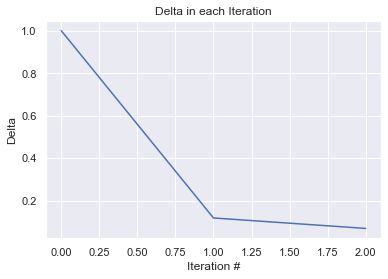

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.plot(delta_records)
plt.xlabel("Iteration #")
plt.ylabel("Delta")
plt.title("Delta in each Iteration")
plt.show()